In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Specify each path

In [2]:
data_directory = "../../../data/"
train_dataset = f'{data_directory}train.csv'
test_dataset = f'{data_directory}test.csv'
model_save_path = './symbol_classifier.keras'
tflite_save_path = './symbol_classifier.tflite'

# Set number of classes

In [3]:
RANDOM_SEED = 42
NUM_CLASSES = 58
MULTI_HAND_LANDMARKS = 126

# Dataset reading

In [4]:
X_train = np.loadtxt(train_dataset, delimiter=',', dtype='float32', usecols=list(range(1, MULTI_HAND_LANDMARKS + 1)))
X_test_data = np.loadtxt(test_dataset, delimiter=',', dtype='float32', usecols=list(range(1, MULTI_HAND_LANDMARKS + 1)))

In [5]:
y_train = np.loadtxt(train_dataset, delimiter=',', dtype='int32', usecols=(0))
y_test_data = np.loadtxt(test_dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test_data, y_test_data, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
print(np.unique(y_train))
print(np.unique(y_test))
print(np.unique(y_valid))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]


In [8]:
print(X_train.shape)
print(y_train.shape)

(24830, 126)
(24830,)


# Model building

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((126, )),
    # tf.keras.layers.BatchNormalization(),  # Normalizes input features
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')  # Output layer with 57 units
])

In [10]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_valid, y_valid),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


182/194 [===========================>..] - ETA: 0s - loss: 3.2532 - accuracy: 0.1651
Epoch 1: saving model to .\symbol_classifier.keras
194/194 [==============================] - 2s 4ms/step - loss: 3.2057 - accuracy: 0.1731 - val_loss: 2.1785 - val_accuracy: 0.4105
Epoch 2/1000
181/194 [==========================>...] - ETA: 0s - loss: 2.0607 - accuracy: 0.3816
Epoch 2: saving model to .\symbol_classifier.keras
194/194 [==============================] - 1s 3ms/step - loss: 2.0393 - accuracy: 0.3865 - val_loss: 1.3442 - val_accuracy: 0.6336
Epoch 3/1000
174/194 [=========================>....] - ETA: 0s - loss: 1.5401 - accuracy: 0.5143
Epoch 3: saving model to .\symbol_classifier.keras
194/194 [==============================] - 1s 3ms/step - loss: 1.5229 - accuracy: 0.5195 - val_loss: 0.9797 - val_accuracy: 0.7414
Epoch 4/1000
188/194 [============================>.] - ETA: 0s - loss: 1.2259 - accuracy: 0.6154
Epoch 4: saving model to .\symbol_classifier.keras
194/194 [

In [13]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

60/60 [==============================] - 0s 1ms/step - loss: 0.1496 - accuracy: 0.9637


In [14]:
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))
print(y_test[0])

1/1 [==============================] - 0s 87ms/step
[3.16906834e-10 2.23062480e-09 3.48325898e-07 1.21742643e-08
 9.51405764e-06 4.96452575e-12 6.89978208e-08 9.77215336e-07
 2.50507739e-08 8.59257832e-10 8.53163237e-06 6.34054642e-10
 2.01399897e-09 4.46707812e-16 2.33440467e-09 1.07163403e-13
 7.62011287e-10 6.77039907e-07 1.68206768e-07 3.81941554e-08
 1.12897078e-06 4.36520090e-14 9.27906016e-12 3.60916288e-12
 3.74163547e-12 2.68442664e-11 2.44815368e-08 1.46336321e-08
 6.97565554e-07 6.81322163e-08 2.68151085e-10 7.49495666e-09
 2.81151852e-10 9.99973536e-01 7.52923699e-18 1.14030541e-12
 3.48644225e-09 3.17307240e-06 6.40856213e-09 5.13855403e-09
 1.33822510e-07 1.03639114e-14 1.56217296e-11 1.17794031e-07
 3.02390113e-09 1.34479127e-14 1.50210221e-13 1.51871487e-18
 8.43312355e-17 3.04840286e-09 2.92677375e-11 1.96838422e-13
 2.17859758e-11 5.80096184e-07 2.61412119e-08 1.55446803e-12
 1.20537239e-12 3.23756581e-12]
33
33


# Confusion matrix

240/240 [==============================] - 0s 992us/step


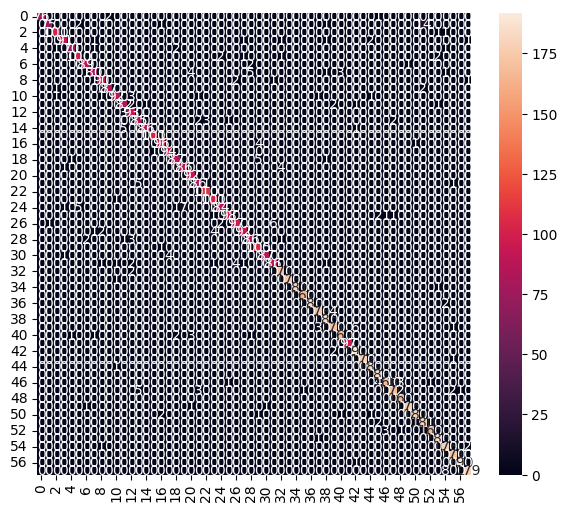

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        79
           1       0.99      0.81      0.89        93
           2       0.97      0.98      0.98       103
           3       0.97      0.93      0.95        98
           4       0.97      0.93      0.95        75
           5       0.93      0.94      0.94       106
           6       0.96      0.97      0.96        92
           7       0.94      0.84      0.89        95
           8       0.95      0.95      0.95        95
           9       0.98      0.97      0.97        90
          10       0.96      0.92      0.94       100
          11       0.90      0.92      0.91        89
          12       0.89      0.97      0.93        96
          13       0.89      0.91      0.90        93
          14       0.99      0.93      0.96        92
          15       0.99      1.00      1.00       101
          16       0.96      0.95      0.96       101
     

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [18]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\zeins\AppData\Local\Temp\tmpcsceohus\assets


INFO:tensorflow:Assets written to: C:\Users\zeins\AppData\Local\Temp\tmpcsceohus\assets


81664

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10
CPU times: total: 0 ns
Wall time: 1e+03 µs
